Data-driven modelling of coastal storm erosion for real-time forecasting at a wave-dominated embayed beach (Ibaceta and Harley, 2024)
https://doi.org/10.1016/j.coastaleng.2024.104596

This notebook shows the use of simple multi-linear regressions to predict storm erosion (Figure 8 of the paper). Future users of this notebook could generate similar models using their shoreline data and forcing variables following the format of theattached data.

Data (data.csv)
The explanatory variables (offshore wave forcing) and resulting dW (columns) for each beach region (exposed, partially-exposed and sheltered) are stored for each storm event (rows).



In [3]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [4]:
plt.rcParams["font.family"] = "arial"
plt.rcParams['font.size'] =14

In [5]:
#Load data
fn = 'data.csv'
df_storms = pd.read_csv(fn, index_col = 0)

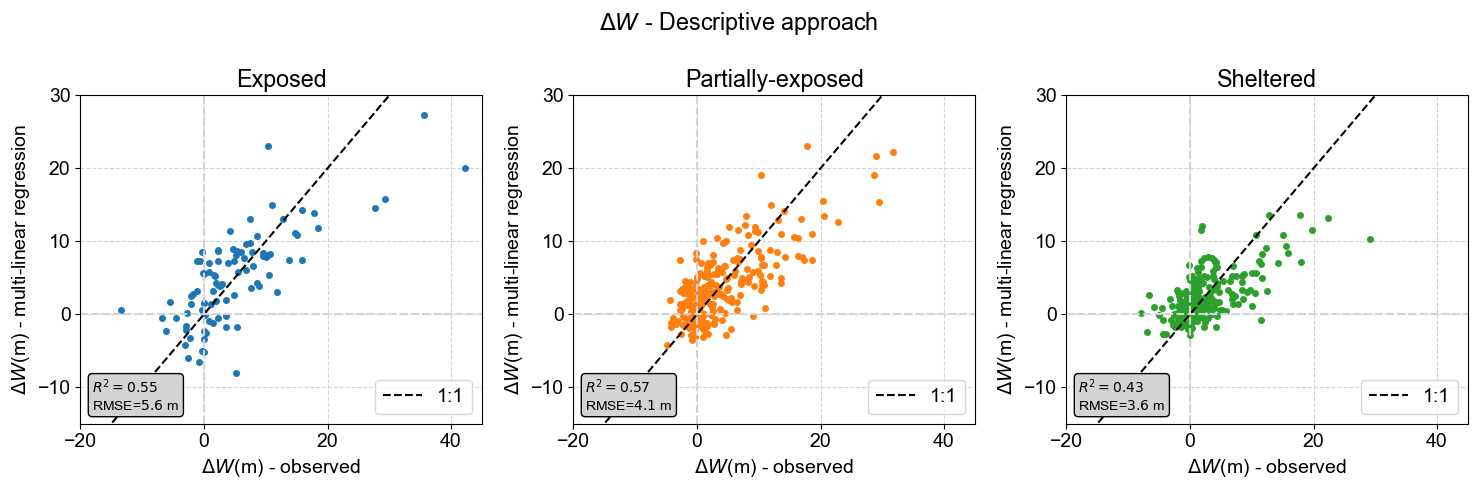

In [7]:
#Obtain multi-linear regression model and plot
cases = [ 'dW_exposed','dW_partially', 'dW_sheltered']
CASES = ['Exposed','Partially-exposed', 'Sheltered'] #for labeling purposes

fig,axs = plt.subplots(1,3,figsize = (15,5))
axs =  axs.ravel()
RMSE = [] 
R2   = []
colors = ['tab:blue','tab:orange','tab:green']
storms = []

avg_dir = 135 #in degrees
for i,case in enumerate(cases):
    
    casewi = 'Wpre'+case[2:]
    df =  df_storms.copy()
    df['sinDrel'] = np.sin((df['Dpo']-avg_dir)*np.pi/180)
    
    df =  df[['Eocum','WLres','Tpeak','sinDrel',casewi, case]]
    
    #renaming
    df.columns = ['CumEOff', 'WLres','Tpeak','sinDrel','Wpre', 'dW']
    
    df =  df.dropna()   

    #Linear regression with intercept
    LR = LinearRegression(fit_intercept=True) 
    LR.fit(df[['CumEOff', 'WLres', 'Tpeak', 'sinDrel', 'Wpre']],df.dW)
    
    
    y_prediction =  LR.predict(df[['CumEOff', 'WLres', 'Tpeak', 'sinDrel', 'Wpre']])
    
    score=r2_score(df.dW,y_prediction) #Coef of determination
    rmse = np.sqrt(mean_squared_error(df.dW,y_prediction)) #root mean squared error
    
    #Plot
    
    textstr = '\n'.join((r'$R^{2}=%.2f$' % (score, ),
                         r'RMSE=$%.1f$ m' % (rmse, )))
    props = dict(boxstyle='round', facecolor='lightgrey')
    axs[i].text(0.03, 0.14, textstr, transform=axs[i].transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    axs[i].plot(df['dW'],y_prediction,'.', label = None, color = colors[i],markersize=8)
    axs[i].plot(np.arange(-30,45,0.5),np.arange(-30,45,0.5),linestyle = 'dashed', color = 'black',label = '1:1')
    axs[i].set_xlim([-20,45])
    axs[i].set_ylim([-15,30])
    axs[i].axvline(x=0, color = 'lightgrey', linestyle = 'dashed')
    axs[i].axhline(y=0, color = 'lightgrey', linestyle = 'dashed')
    axs[i].set_xlabel(r'$\Delta W$'+'(m) - observed')
    axs[i].set_ylabel(r'$\Delta W$'+'(m) - multi-linear regression')
    axs[i].legend(loc = 'lower right')
    axs[i].set_title(CASES[i])  

fig.suptitle(r'$\Delta W$' + ' - Descriptive approach')
for ax in axs:
    ax.grid(linestyle = 'dashed', color = 'lightgrey')
plt.tight_layout()